# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Problem Statement

### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

### Data Dictionary


The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [384]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [385]:
# read the dataset
df = pd.read_csv('C:\\Users\\Rucha\\Desktop\\Business statistics project\\abtest (1).csv')

# Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

# Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [386]:
# view the first rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:
* The Dataframe has 6 columns as mentioned in the Data Dictionary. The data  contains information regarding the interaction of users in both groups with the two versions of the landing page.

In [387]:
# view the last rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Observations:
* There are 100 rows in the Data Frame. The Dataframe has information related to the various factors like `landing_page`, `preferred_language` affecting the `time spent on the page` and the `conversion rate`.

#### Checking the shape of the dataset

In [388]:
df.shape

(100, 6)

#### Observations:
* The dataset contains 100 rows and 6 columns.

#### Checking the data types of the columns for the dataset

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* `group`, `landing_page`, `converted` and `language_preferred` columns are of object type while the remaining two columns `user_id` and `time_spent_on_the_page` are numerical in nature.
* In short, there are 4 categorical columns and 2 numeric columns in the dataset.
* The `object` type column contains categorical data in them.
* `user_id` is key column in the dataset which is unique for every user

#### Checking for missing values

In [390]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:
* There are no missing values in the data.

#### Checking for duplicated values

In [391]:
df.duplicated().sum()

0

In [392]:
df.duplicated(subset=['user_id']).value_counts()

False    100
dtype: int64

#### Observations:
* There are no duplicates present in the dataset

In [393]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
* The `minimum`, `average` and `maximum time_spent_on_the_page` are `0.19 minutes`, `5.37 minutes` and `10.71 minutes` respectively
* There are `2` unique landing pages
* There are `two` unique groups of 50 users each
* There are `3` uniques preferred languages out of which `Spanish` is popular
* `54` out of `100` users are converted after visiting the landing page

### Univariate Analysis

#### Time spent on the page

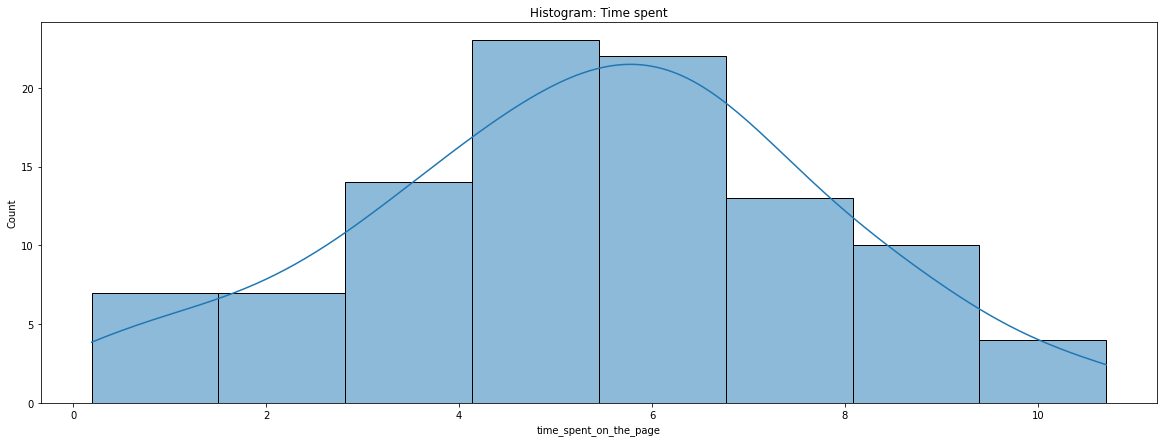

In [394]:
plt.figure(figsize=(20,7))
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.title('Histogram: Time spent')
plt.xlabel('time_spent_on_the_page')
plt.show()

Text(0.5, 1.0, 'Boxplot: time_spent_on_the_page')

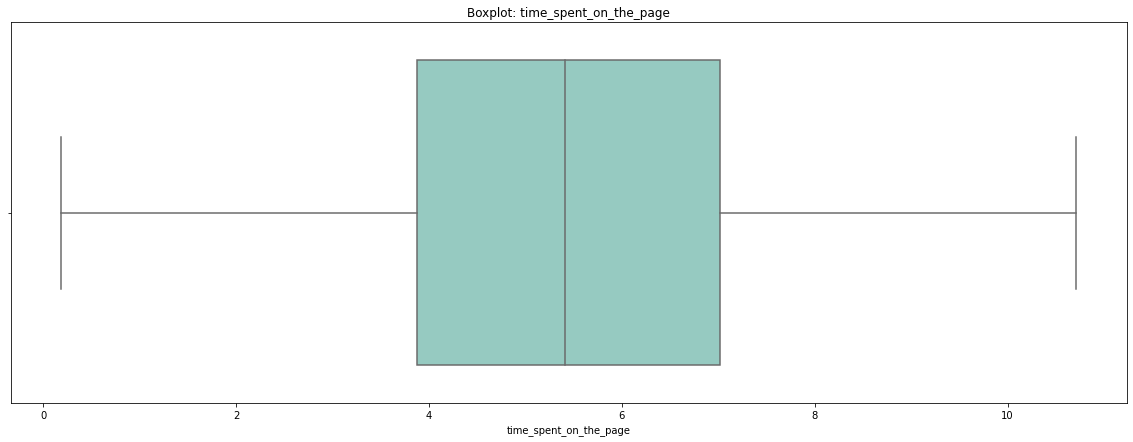

In [395]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='time_spent_on_the_page',palette='Set3');
plt.title('Boxplot: time_spent_on_the_page')

#### Group

In [396]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

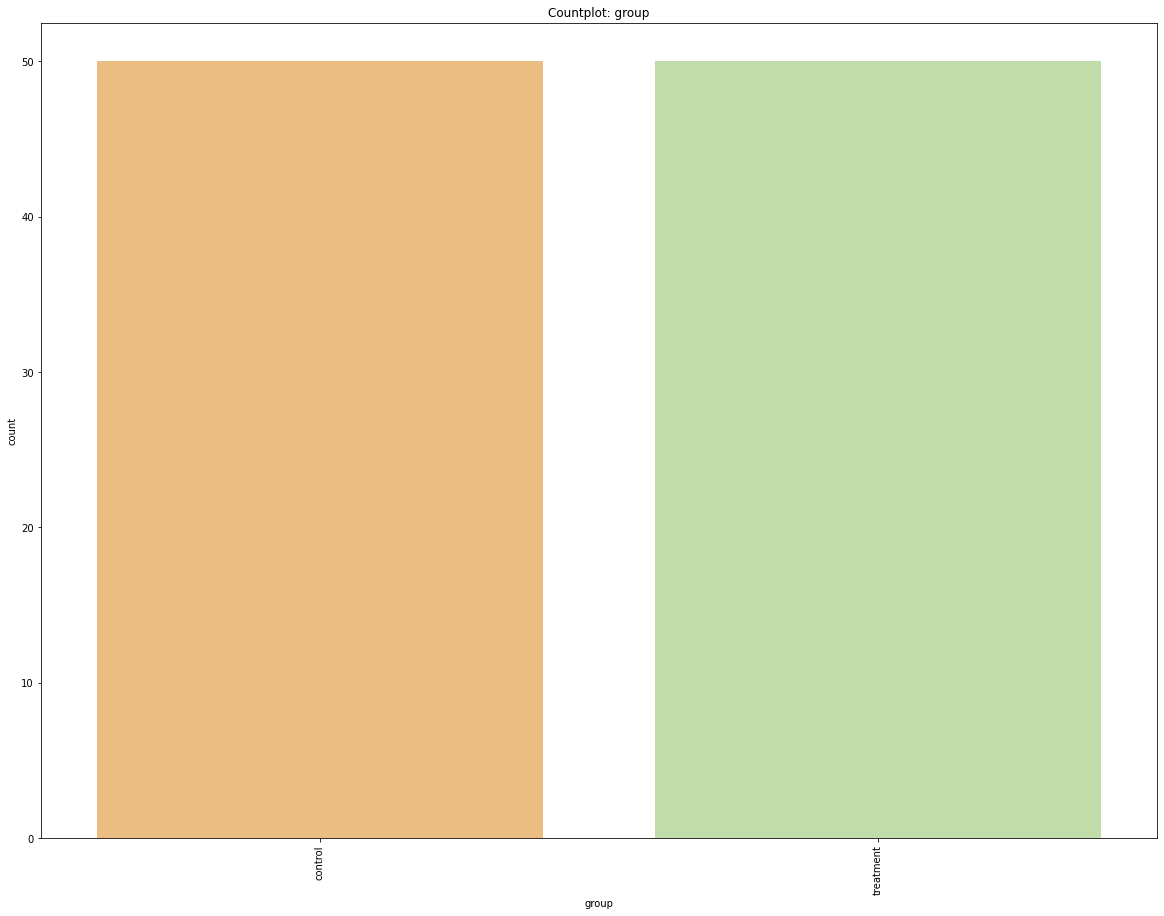

In [397]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='group', palette='Spectral')
plt.xticks(rotation=90)
plt.title('Countplot: group');
plt.show()

#### Language preferred

In [398]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

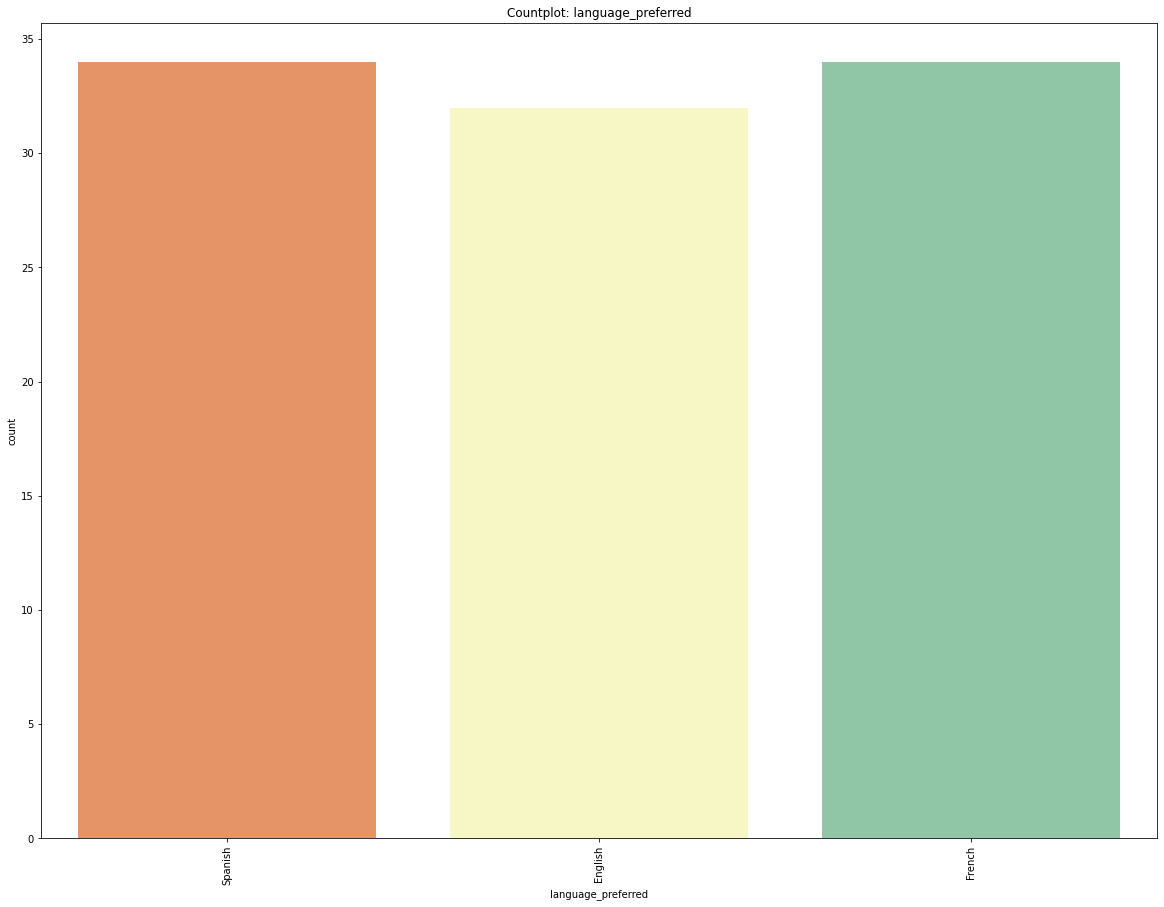

In [399]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='language_preferred', palette='Spectral')
plt.xticks(rotation=90)
plt.title('Countplot: language_preferred');
plt.show()

### Converted

In [400]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

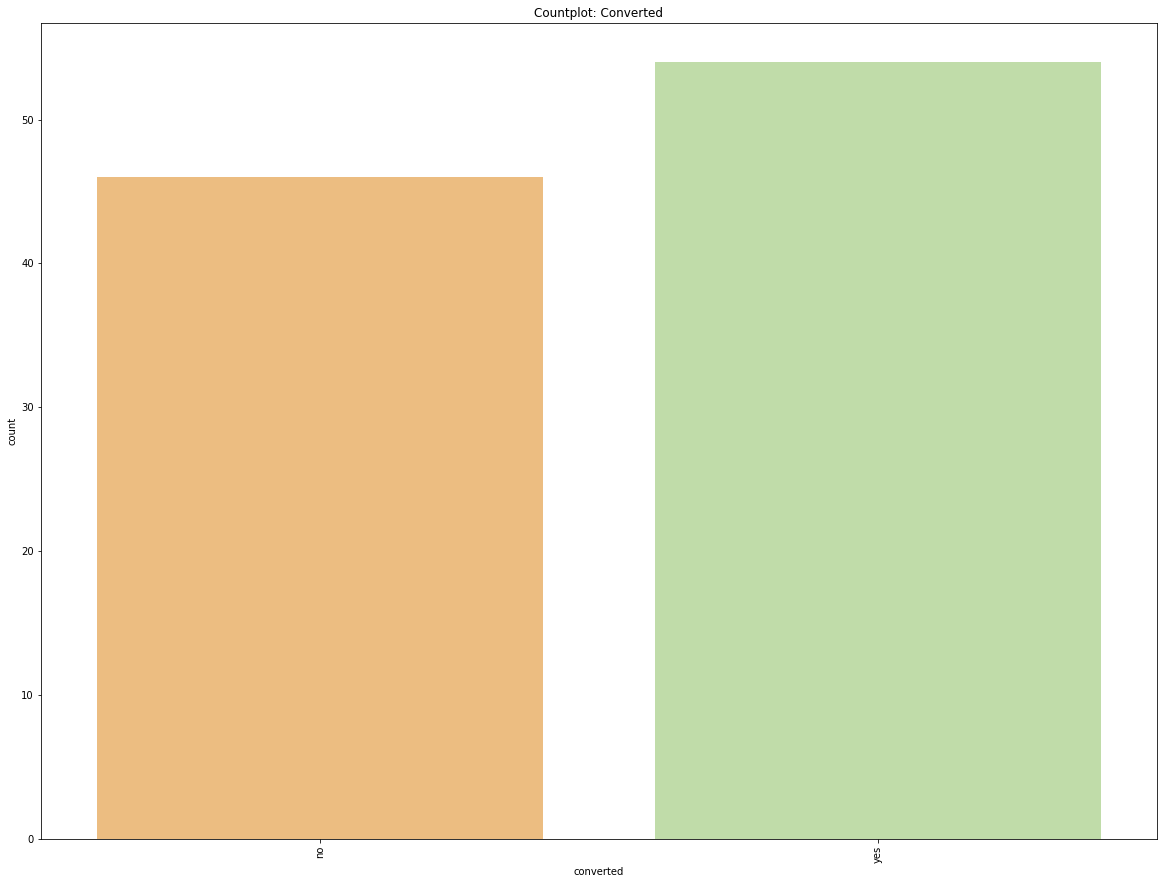

In [401]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='converted', palette='Spectral')
plt.xticks(rotation=90)
plt.title('Countplot: Converted');
plt.show()

#### Landing Page

In [402]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

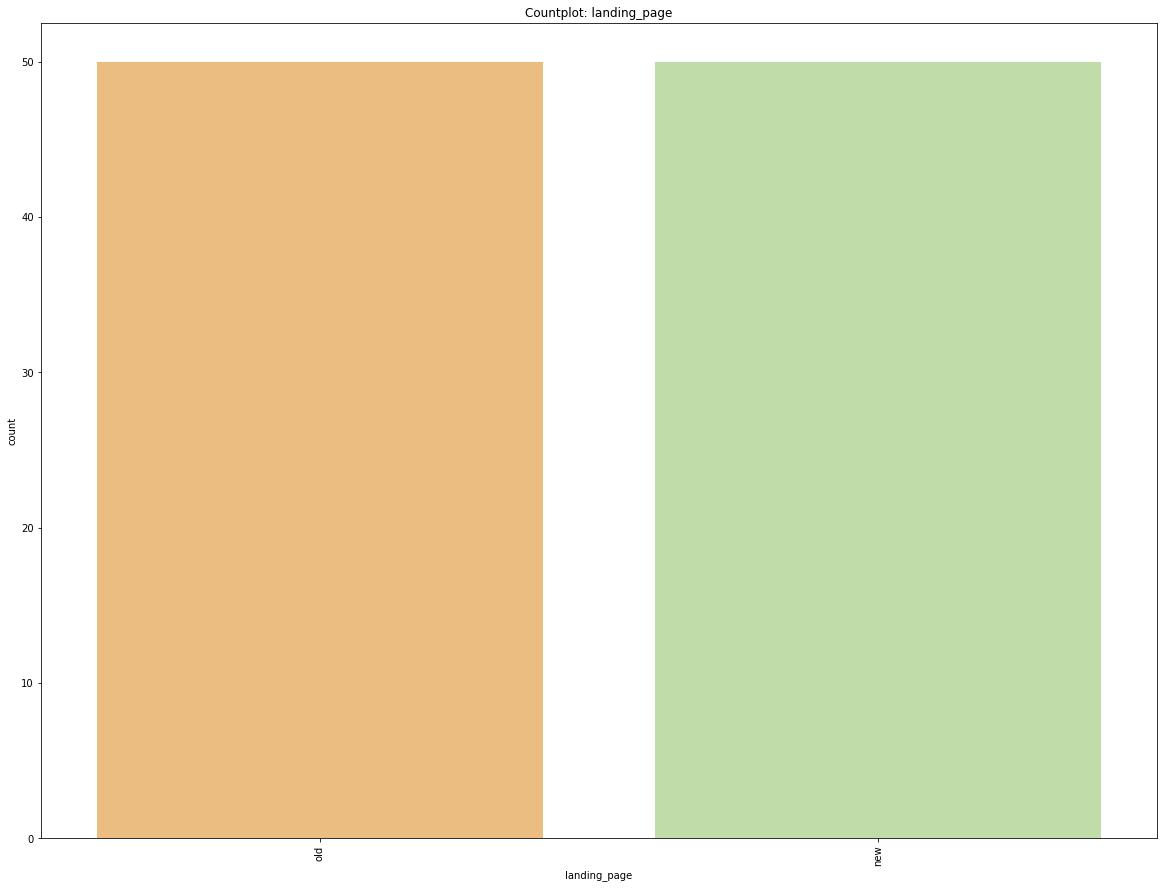

In [403]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='landing_page', palette='Spectral')
plt.xticks(rotation=90)
plt.title('Countplot: landing_page');
plt.show()

In [404]:
df.groupby(['landing_page'])[['user_id']].count().sort_values(by='user_id', ascending=False)

,user_id
landing_page,
new,50
old,50


In [405]:
df.groupby(['language_preferred'])[['user_id']].count().sort_values(by='user_id', ascending=False)

,user_id
language_preferred,
French,34
Spanish,34
English,32


In [406]:
df.groupby(['converted'])[['user_id']].count().sort_values(by='user_id', ascending=False)

,user_id
converted,
yes,54
no,46


In [407]:
df.groupby(['group'])[['user_id']].count().sort_values(by='user_id', ascending=False)

,user_id
group,
control,50
treatment,50


In [408]:
round(df['time_spent_on_the_page'].mean(), ndigits=2)

5.38

#### Observations: 
* The histogram of `time_spent_on_the_page` is normally distributed.
* `time_spent_on_the_page` do not have any outliers.
* The average `time spent on the page` on both the pages is 5.38 minutes.
* `Spanish` and `French` are equally preferred languages followed by `English`.
* 50% of the time_spent_on_the_page is less than `5.41` minutes.
* There are 2 unique groups namely `control` and the `treatment` group consisting of `50` users each.
* `Yes` and `No` are the 2 unique values for the converted column. `54`users preferred to get converted while `46` of the users chose to remain unconverted.
* `50 out of 100` users visited the `old landing page` while remaining `50` users visited the `new landing page`.

### Bivariate Analysis

#### Language Preferrred vs Time spent on the page

<Figure size 1440x1080 with 0 Axes>

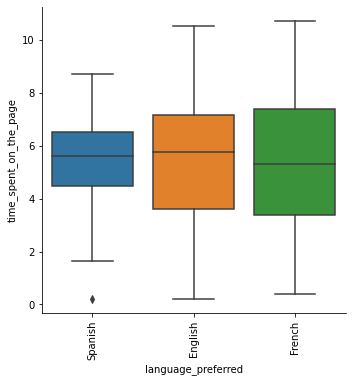

In [409]:
plt.figure(figsize=(20,15))
sns.catplot(x='language_preferred', y='time_spent_on_the_page', data=df, kind="box")
plt.xticks(rotation=90)
plt.show()

In [410]:
df.groupby(['language_preferred'])[['time_spent_on_the_page']].mean().sort_values(by='time_spent_on_the_page', ascending=False)

,time_spent_on_the_page
language_preferred,
English,5.559062
Spanish,5.331765
French,5.253235


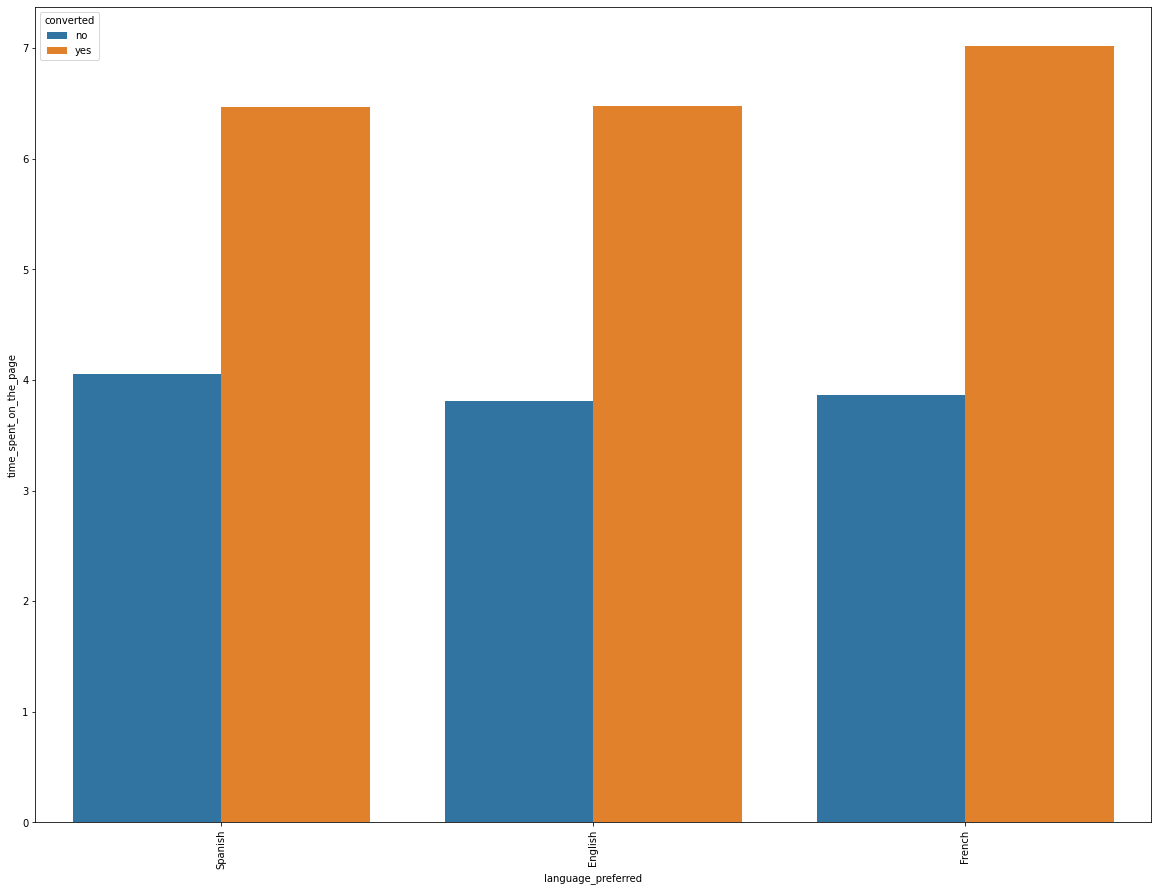

In [411]:
plt.figure(figsize=(20,15))
sns.barplot(x='language_preferred', y='time_spent_on_the_page', hue = 'converted', data=df, ci = False)
plt.xticks(rotation=90)
plt.show();

#### Landing page vs Time spent on the page

<Figure size 1440x1080 with 0 Axes>

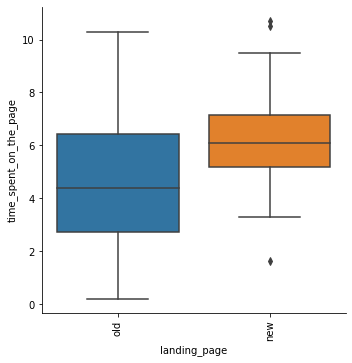

In [412]:
plt.figure(figsize=(20,15))
sns.catplot(x='landing_page', y='time_spent_on_the_page', data=df, kind="box")
plt.xticks(rotation=90)
plt.show();

In [413]:
df.groupby(['landing_page'])[['time_spent_on_the_page']].mean().sort_values(by='time_spent_on_the_page', ascending=False)

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


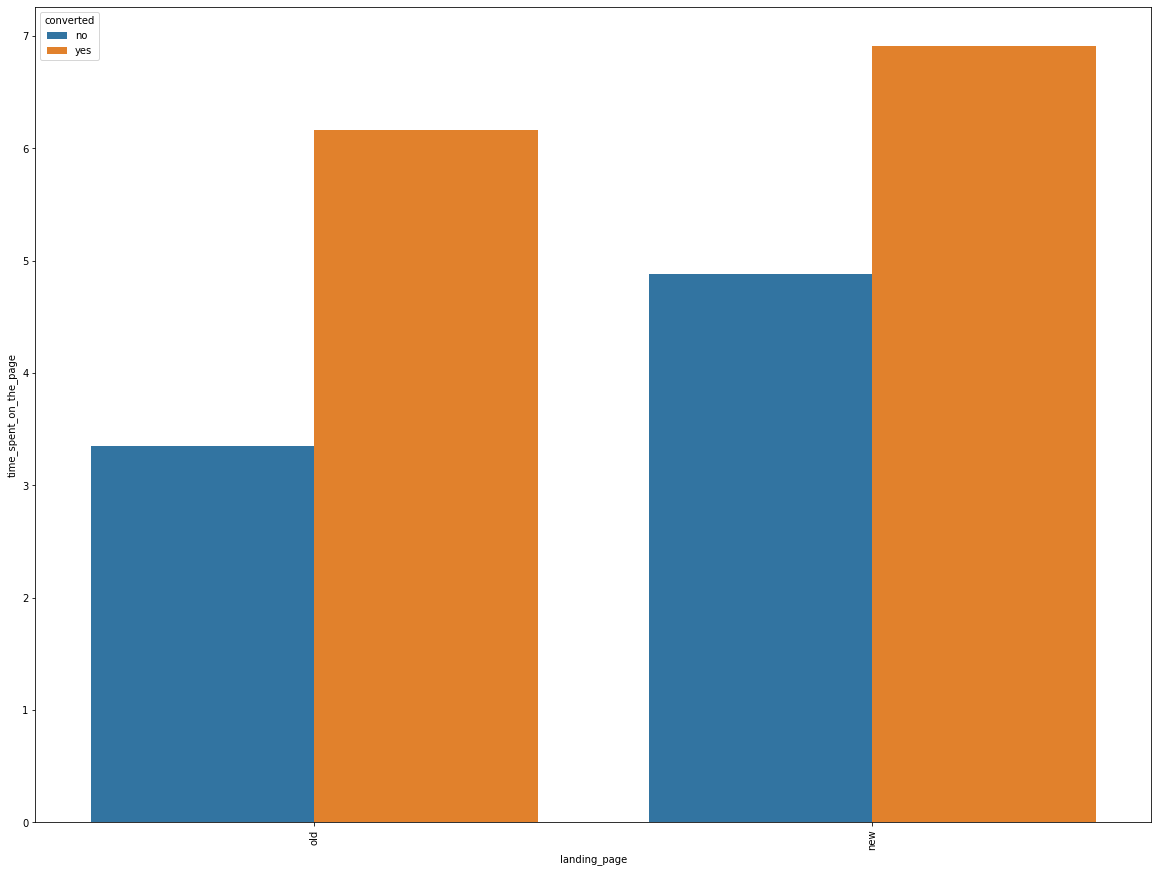

In [414]:
plt.figure(figsize=(20,15))
sns.barplot(x='landing_page', y='time_spent_on_the_page', hue ='converted', data=df, ci = False)
plt.xticks(rotation=90)
plt.show();

#### Conversion status vs Time spent on the page

<Figure size 1440x1080 with 0 Axes>

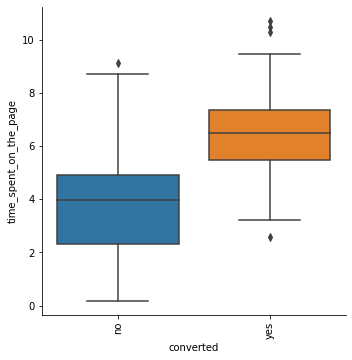

In [415]:
plt.figure(figsize=(20,15))
sns.catplot(x='converted', y='time_spent_on_the_page', data=df, kind="box")
plt.xticks(rotation=90)
plt.show();

In [416]:
df.groupby(['converted'])[['time_spent_on_the_page']].mean().sort_values(by='time_spent_on_the_page', ascending=False)

,time_spent_on_the_page
converted,
yes,6.623148
no,3.915870


#### Group vs Time spent on the page

<Figure size 1440x1080 with 0 Axes>

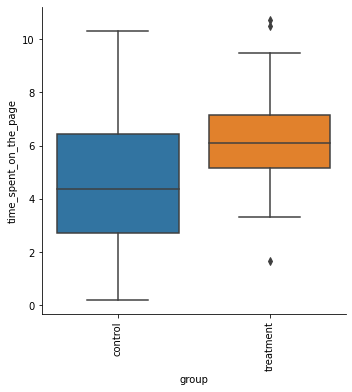

In [417]:
plt.figure(figsize=(20,15))
sns.catplot(x='group', y='time_spent_on_the_page', data=df, kind="box")
plt.xticks(rotation=90)
plt.show();

In [418]:
df.groupby(['group'])[['time_spent_on_the_page']].mean().sort_values(by='time_spent_on_the_page', ascending=False)

,time_spent_on_the_page
group,
treatment,6.2232
control,4.5324


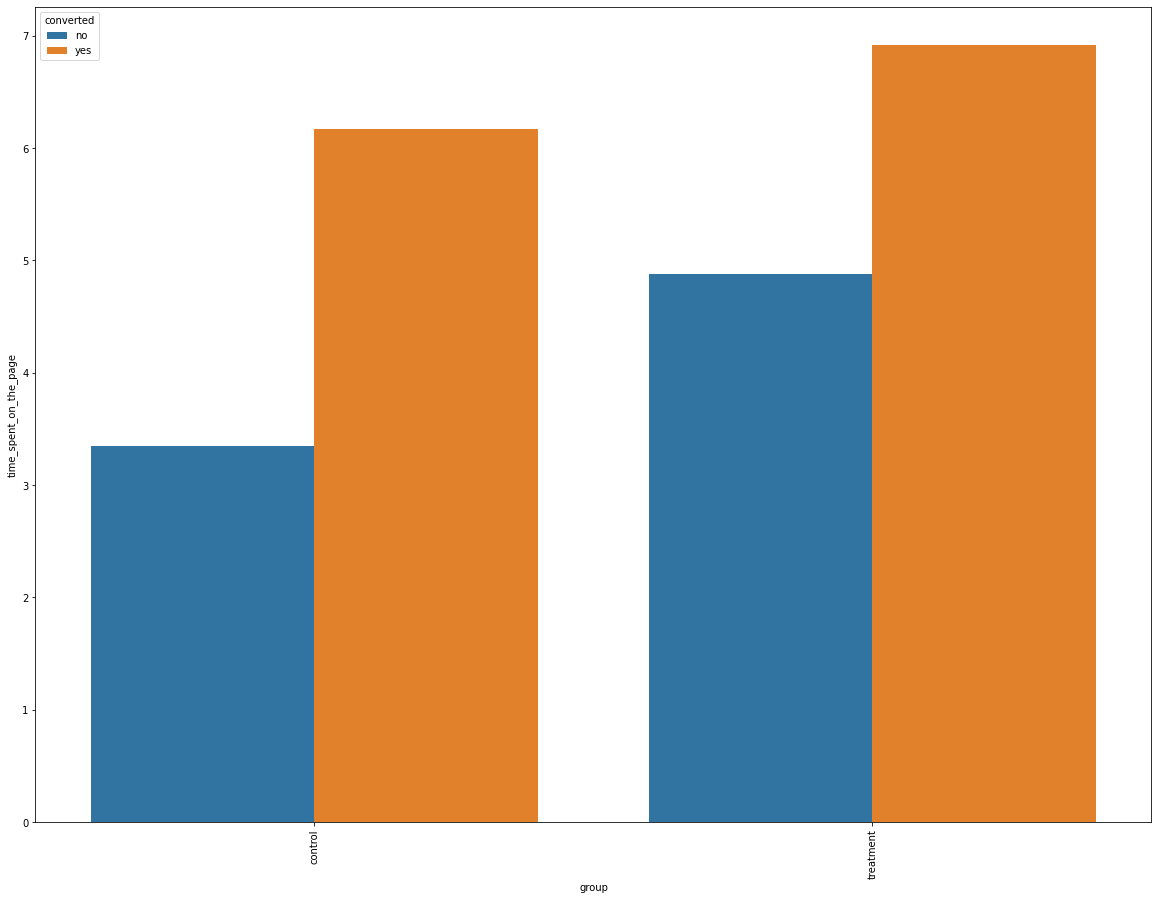

In [419]:
plt.figure(figsize=(20,15))
sns.barplot(x='group', y='time_spent_on_the_page', hue = 'converted', data=df, ci = False)
plt.xticks(rotation=90)
plt.show();

#### Observations:
* A few of the `Spanish` preferring users have spent extremely low time on the landing page. 
* For the converted users, the average time spent on the landing page is greater for the `French` language preferring people  followed by `English` and `Spanish` preferring people.
* The average time spent on the new landing page (`6.22 minutes`) is more than that spent on the old landing page (`4.53 minutes`). It is also observed that there are few users who spend extremely low and extremely high time on the new landing page which are observed as `outliers`.
* The average time spent by the users who get converted (`6.62 mins`) is higher than the non-converted users(`3.91 mins`). Some of the converted users have spent extremely high time on the page (`>10 mins`), while some of the converted users have spent extremely low time `~2.5 minutes` on the landing page.
* Few of the non-converted users have spent extremely high (`~ 9mins`) time on the landing page.
* Few of the `treatment` group users have spent extra sufficient time (`>10 mins`), while few of them has spent less sufficient time(`< 2 mins`) on the new landing page.
* The `treatment` group users in general(considering both converted and non-converted users) have spent more time on the landing page than the `control` group users.
* users under `control` group who are not converted to subscriber tend to spend very less time (~`3.3` min) 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

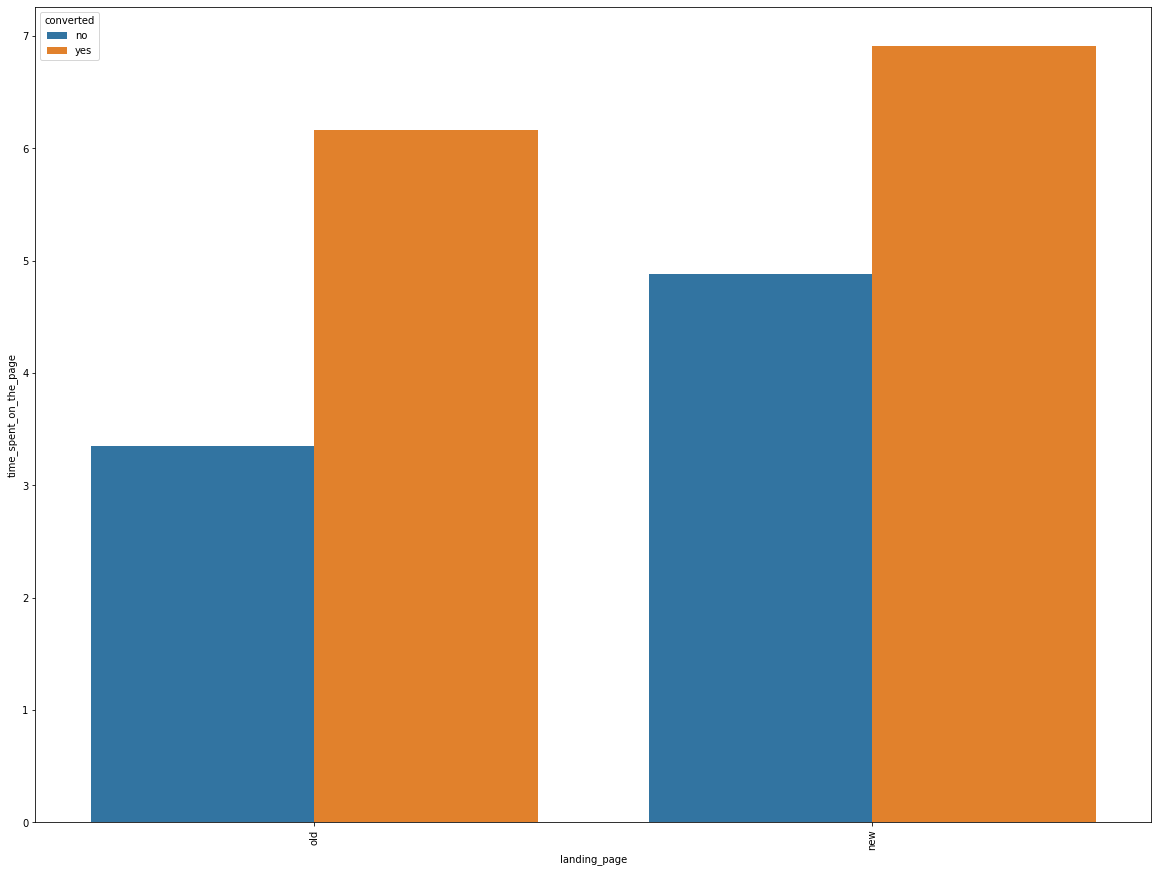

In [420]:
plt.figure(figsize=(20,15))
sns.barplot(x='landing_page', y='time_spent_on_the_page', hue='converted',data=df, ci=False)
plt.xticks(rotation=90)
plt.show();

Sample mean: 5.38


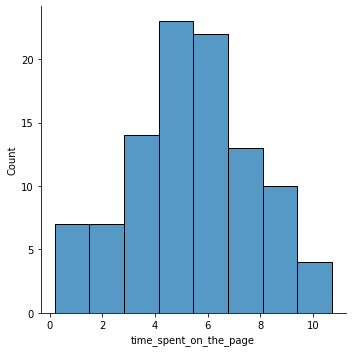

In [421]:
# plot the distribution plot of time_spent_on_the_page
print('Sample mean:', np.round(df.time_spent_on_the_page.mean(),2))
sns.displot(df.time_spent_on_the_page)
plt.show()

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the time spent on the existing landing page and on new landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_2\gt\mu_1$


In [422]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on existing landing page is ', round(df.loc[df['landing_page']== 'old', 'time_spent_on_the_page'].mean(), 2))
print('The mean time spent on new landing page is  ' , round(df.loc[df['landing_page']=='new', 'time_spent_on_the_page'].mean(),2))
print('The standard deviation of time spent on exisiting landing page is ' ,round(df.loc[df['landing_page']== 'old', 'time_spent_on_the_page'].std(),2))
print('The standard deviation of time spent on new landing page is ', round(df.loc[df['landing_page']== 'new', 'time_spent_on_the_page'].std(),2))

The mean time spent on existing landing page is  4.53
The mean time spent on new landing page is   6.22
The standard deviation of time spent on exisiting landing page is  2.58
The standard deviation of time spent on new landing page is  1.82


### Step 2: Select Appropriate test

#### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes,the sample distribution is viewed to be normal so  the populations can be assumed to be normal.
* Independent populations - As we are taking random samples for two different groups(`old` and `new`) , the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can use two sample independant T-test for this problem.



### Step 3: Decide the significance level

* The statistical analysis will be performed at a significance level of 5% (alpha = 0.05)

### Step 4: Collect and prepare data

In [423]:
data = df.copy()
data['exist_land_page'] = df.loc[df['landing_page']=='old', 'time_spent_on_the_page']
data['new_land_page'] = df.loc[df['landing_page']=='new', 'time_spent_on_the_page']
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,exist_land_page,new_land_page
0,546592,control,old,3.48,no,Spanish,3.48,NaN
1,546468,treatment,new,7.13,yes,English,NaN,7.13
2,546462,treatment,new,4.40,no,Spanish,NaN,4.40
3,546567,control,old,3.02,no,French,3.02,NaN
4,546459,treatment,new,4.75,yes,Spanish,NaN,4.75


### Step 5: Calculate the p-value

#The [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function of Scipy will be used to compute the test statistic and p-value.

In [424]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(data['new_land_page'].dropna(), data['exist_land_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

* As the p-value(`0.000139`) is less than the level of significance (0.05), we reject the null hypothesis.

### Step 7:  Draw inference

* Since we reject the null hypothesis, we have enough evidence to support the claim that the users spend `more` time on the `new landing page` than the `existing landing page`.
* The new landing page is favoured by the users as compared to old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

<Figure size 1440x1080 with 0 Axes>

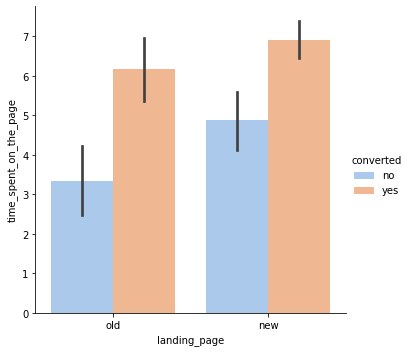

In [425]:
plt.figure(figsize=(20,15))
sns.catplot(data=df, x="landing_page", y= "time_spent_on_the_page", hue="converted", kind='bar', palette='pastel');

## Step 1: Define null and alternative hypotheses

* 'landing_page' and 'converted' are two categorical variables.
* We want to see if the proportion of users visiting the new landing page and getting converted is greater than the proportion of users visiting the old landing page and getting converted.


* $H_0:$ The proportion of users visiting new landing page and getting converted is equal to the proportion of users visiting old landing page and getting converted.

* $H_a:$ The proportion of users visiting new landing page and getting converted is greater than the proportion of users visiting old landing page and getting converted.

## Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test (2 sample Z-test) for this problem.

## Step 3: Decide the significance level

Here, we select α = 0.05.

## Step 4: Data Preparation

### Preparing data for test

In [426]:
# number of users visiting the new page

visitors_new = df[df['landing_page']=='new']

Number_visitors_new = df[df['landing_page']=='new']['landing_page'].value_counts()


print('The number of visitors for new landing page are ', Number_visitors_new)

# number of users visiting the old page


visitors_old = df[df['landing_page']=='old']

Number_visitors_old = df[df['landing_page']=='old']['landing_page'].value_counts()

print('The number of visitors for old landing page are ', Number_visitors_old)




The number of visitors for new landing page are  new    50
Name: landing_page, dtype: int64
The number of visitors for old landing page are  old    50
Name: landing_page, dtype: int64


In [427]:
# number of users visiting the new page and getting converted

visitors_new_converted = visitors_new.loc[visitors_new['converted']== 'yes'][['converted']].value_counts(ascending=False)
print('The numbers of users visiting the new landing page and getting converted are ', visitors_new_converted)


visitors_old_converted = visitors_old.loc[visitors_old['converted']== 'yes'][['converted']].value_counts(ascending=False)
print('The numbers of users visiting the old landing page and getting converted are ', visitors_old_converted)

The numbers of users visiting the new landing page and getting converted are  converted
yes          33
dtype: int64
The numbers of users visiting the old landing page and getting converted are  converted
yes          21
dtype: int64


In [428]:
print(f' The proportions of users getting converted on new landing page and old landing page respectively are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of users getting converted on new landing page and old landing page respectively are 0.66, 0.42 respectively


The proportions in the sample are different. Let's conduct the test to see if this difference is significant.

## Step 5: Calculate the p-value

In [429]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
stat, pval = proportions_ztest([visitors_new_converted, visitors_old_converted] , [Number_visitors_new, Number_visitors_old], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is [0.00802631]


## Step 6: Compare the p-value with $\alpha$

In [430]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value [0.00802631] is less than the level of significance, we reject the null hypothesis.


## Step 7: Conclusion

* Since the p-value is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for the new page (proportion of users visiting the new landing page and getting converted) is greater than the conversion rate for the old page (proportion of users visiting the old landing page and getting converted).

## 3. Is the conversion and preferred language are independent or related?

### Preparation for Visual Analysis

In [431]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Since both the concerned variables are categorical in nature, we can use a contingency table and a stacked bar graph to visually inspect the data.

- A contingency table is a tabular representation of categorical data that shows the number of observations for combinations of values between two categorical variables, say X and Y
- Each cell in the contingency table represents a combination of X-Y values



In [432]:
# create a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(df.converted,df.language_preferred,margins=True)

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


* There are a total of 100 people in the sample.
* In the converted group, 21 out of 54 (or 38.88%)  prefer `English`, 15 out of 54(or 27.77%) prefer `French` and 18 out of 54 (or 33.33%) prefer `Spanish`. 
* In the non-converted group, 11 out of 46 (or 23.91%) prefer `English`, 19 out of 46 (or 41.31%) prefer `French` and 16 out of 46 (or 34.78%) prefer `Spanish`.

To visualize the relationship between the two categorical variables, we can plot a stacked bar chart.



### Perform Visual Analysis

<AxesSubplot:xlabel='converted'>

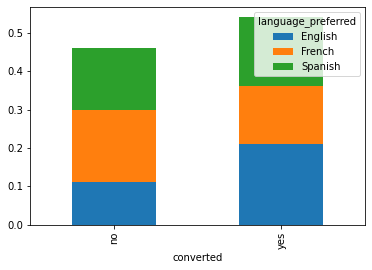

In [433]:
# visual analysis
pd.crosstab(df.converted,df.language_preferred,normalize=True).plot(kind='bar',stacked=True)

* The proportion of `English` preferring users is higher in the `converted` group than the non-converted group.
* The proportion of `French` preferring users is higher in the `non-converted` group than the converted group.
* Based on the sample data, we can infer that the proportion of English preferring users is higher for converted group, but we need to check if this difference is statistically significant enough to conclude that conversion status is dependent on the preferred language

### Step 1: Define null and alternative hypotheses

**Let's formulate the null and alternative hypothesis for the above problem**

$H_0:$ Conversion and preferred language are independent of each other

$H_a:$ Conversion and preferred language are dependent on each other

### Step 2: Select Appropriate test

To test the dependence between two categorical variables, a Chi-square test for independence is used.

A **chi-square test for independence** is a test based on the chi-square probability distribution. It involves the calculation of a chi-square test statistic. A chi-square (χ2) statistic is a measure of the difference between the observed and expected frequencies of the outcomes of a set of events or variables, given the size of the sample and the number of variables in the relationship. The idea behind the chi-square test is to compare what we observe in the random sample to what we expect to observe when we assume that there is no relationship between the two variables.

### Step 3: Decide the significance level

Let's set the level of significane (alpha) as 0.05

### Step 4: Collect and prepare data

Let's prepare the data for the test. To perform the chi-squared test of independance, we need to create the contingency table, for which we will use `pd.crosstab()`

In [434]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

We will use the `chi2_contingency` function from the scipy stats library to perform the hypothesis test. It takes the contingency table as an input and returns the test statistic, p-value, degrees of freedom, and the expected frequencies as the output.

In [435]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",round(chi, 3))
print("p-value =",round(p_value, 3))
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.093
p-value = 0.213
Degrees of freedom = 2
Expected frequencies 
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [436]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

* Since the p-value `0.213` is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that conversion and preferred language are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

### Preparation for Visual analysis

In [437]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [438]:
data_new_page =  df.loc[df['landing_page']=='new']
data_new_page.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


* Here, time spent on the new page is the response and language preferred is the factor.

In [439]:
# get the levels of factor language_preferred
data_new_page['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

### Perform Visual Analysis

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


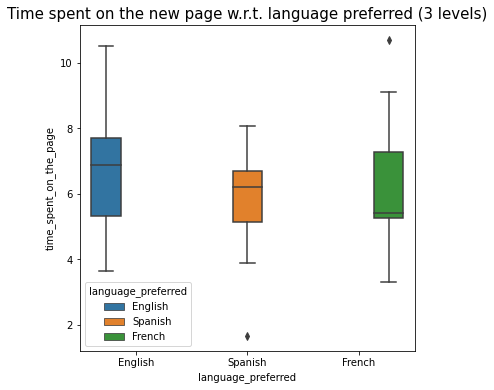

In [440]:
# mean of time spent on new page at different levels of the language_preferred factor
print(data_new_page.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = data_new_page, hue = 'language_preferred')
a.set_title("Time spent on the new page w.r.t. language preferred (3 levels)", fontsize=15)
plt.show()


* 50% of the english, spanish and French preferring users are spending ~7 mins, ~6.5 mins, ~5.5 mins on new landing page respectively. 
* We need to check if this difference is statistically significant enough to conclude that conversion status is dependent on the preferred language

### Step 1: Define null and alternative hypotheses

#### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for language English, Spanish and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time spent is different from the rest.

### Step 2: Select Appropriate test

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

The [`shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [441]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(data_new_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


* Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [442]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(data_new_page['time_spent_on_the_page'][data_new_page['language_preferred']=="English"], 
                                   data_new_page['time_spent_on_the_page'][data_new_page['language_preferred']=="Spanish"], 
                                   data_new_page['time_spent_on_the_page'][data_new_page['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


* Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

##### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Step 3: Decide the significance level

* Here we will use the significance level (alpha = 0.05)

### Step 4: Calculate the p-value

#### Let's find the p-value

The [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function of Scipy will be used to compute the test statistic and p-value.

In [443]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(data_new_page.loc[data_new_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              data_new_page.loc[data_new_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              data_new_page.loc[data_new_page['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 5: Compare the p-value with $\alpha$

In [444]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6:  Draw inference

* As the p-value `0.432` is much greater than the significance level (0.05), we fail to reject the null hypothesis. Hence, we have enough statistical significance to conclude that the time spent on the new page is same for the different language users

## Conclusion 

* For the converted users, the average time spent on the landing page is greater for the `French` preferring people (~7 mins) followed by `English` and `Spanish` preferring people. Hence we can conclude based on sample data that converted `French` preferring people spent more time on page than others. 
* The average time spent on the new landing page (`6.22 minutes`) is more than that spent on the old landing page (`4.53 minutes`). Hence we can conclude that new landing page is more favourable to attract subscribers. 
* The average time spent by the users who get converted (`6.62 mins`) is higher than the non-converted users(`3.91 mins`). Hence we can conclude that users not interested in subscription spend less time surfing the pages.
* users under `control` group who are not converted to subscriber tend to spend very less time (~`3.3` min) on old landing page. Hence we can conclude that old landing page is not effective enough to attract subscribers.
* We have enough statistical evidence to support the claim that the users spend `more` time on the `new landing page` than the `existing landing page`.
* We have enough statistical evidence to say that the conversion rate for the new page (proportion of users visiting the new landing page and getting converted) is greater than the conversion rate for the old page (proportion of users visiting the old landing page and getting converted). Hence new landing page is more effective in converting users into subscribers.
* We have enough statistical evidence to say that conversion and preferred language are independent of each other. Hence, conversion is not dependent on landing page language. 
* We have enough statistical significance to conclude that the time spent on the new page is same for the different language users. Hence language does not act as an incentive to attract subscribers. 


## Business Recommendations

* ENews Express should conduct a survey on the non-converted users from new landing page to know more about their feedback (likes and dislikes) on the new landing page. Further, they can work on how to change the disliked content.
* Enews Express should add more graphical features to new landing page to attract additional subscribers.
* Enews Express should retain/upgrade features on new landing page from old landing page that helped attracting users to become subscriber 
* ENews Express should know more about the content likes of the converted users from new landing page and create content aligned to that Genre in future.
* ENews Express team should create contents including audio, graphics and videos in all the available languages (apart from Spanish, French and English) to attract users from different languages globally, although it was proved statistically that language does not attract susbcribers.




___